In [4]:
import pandas as pd 
import numpy as np 
from statsmodels.discrete.discrete_model import Logit 
import statsmodels.tools as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot 
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model

In [5]:
#Question 1

In [6]:
data = pd.read_excel('/Users/hayko/Downloads/Telecom_Churn.xls')

In [7]:
data.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Churn  Int'l Plan  VMail Plan  ...  Day Charge  Eve Calls  \
0               1      0           0           1  ...       45.07         99   
1               1      0           0           1  ...       27.47        103   
2               0      0           0           0  ...       41.38        110   
3               2      0           1           0  ...       50.90         88   
4               3      0           1           0  ...       28.34        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone  
0       415  382-4657  
1       415  371-7191  
2       415  358-1921  
3       408  375-9999  
4       415  330-6626  

[5 rows x 21 columns]

In [8]:
data=data.drop("Phone", axis=1)
#Contains no useful information in terms of regression

In [9]:
data=data.drop("Area Code", axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Int'l Plan      3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [11]:
data.describe()

Account Length  VMail Message     Day Mins     Eve Mins   Night Mins  \
count     3333.000000    3333.000000  3333.000000  3333.000000  3333.000000   
mean       101.064806       8.099010   179.775098   200.980348   200.872037   
std         39.822106      13.688365    54.467389    50.713844    50.573847   
min          1.000000       0.000000     0.000000     0.000000    23.200000   
25%         74.000000       0.000000   143.700000   166.600000   167.000000   
50%        101.000000       0.000000   179.400000   201.400000   201.200000   
75%        127.000000      20.000000   216.400000   235.300000   235.300000   
max        243.000000      51.000000   350.800000   363.700000   395.000000   

         Intl Mins  CustServ Calls        Churn   Int'l Plan   VMail Plan  \
count  3333.000000     3333.000000  3333.000000  3333.000000  3333.000000   
mean     10.237294        1.562856     0.144914     0.096910     0.276628   
std       2.791840        1.315491     0.352067     0.295879     0.447398   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       8.500000        1.000000     0.000000     0.000000     0.000000   
50%      10.300000        1.000000     0.000000     0.000000     0.000000   
75%      12.100000        2.000000     0.000000     0.000000     1.000000   
max      20.000000        9.000000     1.000000     1.000000     1.000000   

         Day Calls   Day Charge    Eve Calls   Eve Charge  Night Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.435644    30.562307   100.114311    17.083540   100.107711   
std      20.069084     9.259435    19.922625     4.310668    19.568609   
min       0.000000     0.000000     0.000000     0.000000    33.000000   
25%      87.000000    24.430000    87.000000    14.160000    87.000000   
50%     101.000000    30.500000   100.000000    17.120000   100.000000   
75%     114.000000    36.790000   114.000000    20.000000   113.000000   
max     165.000000    59.640000   170.000000    30.910000   175.000000   

       Night Charge   Intl Calls  Intl Charge  
count   3333.000000  3333.000000  3333.000000  
mean       9.039325     4.479448     2.764581  
std        2.275873     2.461214     0.753773  
min        1.040000     0.000000     0.000000  
25%        7.520000     3.000000     2.300000  
50%        9.050000     4.000000     2.780000  
75%       10.590000     6.000000     3.270000  
max       17.770000    20.000000     5.400000

In [12]:
data.shape


(3333, 19)

In [13]:
data.describe()

Account Length  VMail Message     Day Mins     Eve Mins   Night Mins  \
count     3333.000000    3333.000000  3333.000000  3333.000000  3333.000000   
mean       101.064806       8.099010   179.775098   200.980348   200.872037   
std         39.822106      13.688365    54.467389    50.713844    50.573847   
min          1.000000       0.000000     0.000000     0.000000    23.200000   
25%         74.000000       0.000000   143.700000   166.600000   167.000000   
50%        101.000000       0.000000   179.400000   201.400000   201.200000   
75%        127.000000      20.000000   216.400000   235.300000   235.300000   
max        243.000000      51.000000   350.800000   363.700000   395.000000   

         Intl Mins  CustServ Calls        Churn   Int'l Plan   VMail Plan  \
count  3333.000000     3333.000000  3333.000000  3333.000000  3333.000000   
mean     10.237294        1.562856     0.144914     0.096910     0.276628   
std       2.791840        1.315491     0.352067     0.295879     0.447398   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       8.500000        1.000000     0.000000     0.000000     0.000000   
50%      10.300000        1.000000     0.000000     0.000000     0.000000   
75%      12.100000        2.000000     0.000000     0.000000     1.000000   
max      20.000000        9.000000     1.000000     1.000000     1.000000   

         Day Calls   Day Charge    Eve Calls   Eve Charge  Night Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.435644    30.562307   100.114311    17.083540   100.107711   
std      20.069084     9.259435    19.922625     4.310668    19.568609   
min       0.000000     0.000000     0.000000     0.000000    33.000000   
25%      87.000000    24.430000    87.000000    14.160000    87.000000   
50%     101.000000    30.500000   100.000000    17.120000   100.000000   
75%     114.000000    36.790000   114.000000    20.000000   113.000000   
max     165.000000    59.640000   170.000000    30.910000   175.000000   

       Night Charge   Intl Calls  Intl Charge  
count   3333.000000  3333.000000  3333.000000  
mean       9.039325     4.479448     2.764581  
std        2.275873     2.461214     0.753773  
min        1.040000     0.000000     0.000000  
25%        7.520000     3.000000     2.300000  
50%        9.050000     4.000000     2.780000  
75%       10.590000     6.000000     3.270000  
max       17.770000    20.000000     5.400000

In [14]:
print("Duplicates:", data.duplicated().sum())
#No duplicates found. Also given that we do not have id's or any other specific information
#on observations, we could not decide to drop duplicates as they might turn out to be different
# people with same characteristics

Duplicates: 0


In [15]:
data.isna().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Int'l Plan        0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
dtype: int64

In [16]:
#Question 2

In [17]:
print("Missing values:", data.isna().sum().sum())

Missing values: 0


In [18]:
print("Single valued columns:", data.columns[data.nunique()==1])

Single valued columns: Index([], dtype='object')


In [19]:
data.nunique()

Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan           2
VMail Plan           2
Day Calls          119
Day Charge        1667
Eve Calls          123
Eve Charge        1440
Night Calls        120
Night Charge       933
Intl Calls          21
Intl Charge        162
State               51
dtype: int64

In [20]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")
# Splitting data into category with numerical values and object in order to be able to
# use correlation command only for numerical variables or find outliers

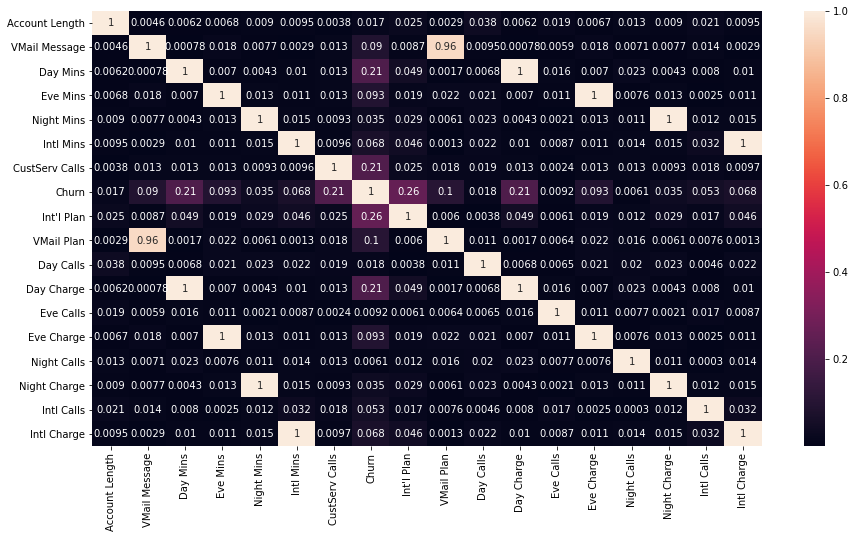

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs(), annot=True)
plt.show()

In [22]:
#Questio 4

In [23]:
#as we can see number some variables are perfectly correlated, therefore we need to drop them

In [24]:
data_num=data_num.drop("VMail Message", axis=1)

In [25]:
data_num=data_num.drop("Day Charge", axis=1)

In [26]:
data_num=data_num.drop("Eve Charge", axis=1)
data_num=data_num.drop("Night Charge", axis=1)
data_num=data_num.drop("Intl Charge", axis=1)

In [27]:
data_num.head()

Account Length  Day Mins  Eve Mins  Night Mins  Intl Mins  CustServ Calls  \
0             128     265.1     197.4       244.7       10.0               1   
1             107     161.6     195.5       254.4       13.7               1   
2             137     243.4     121.2       162.6       12.2               0   
3              84     299.4      61.9       196.9        6.6               2   
4              75     166.7     148.3       186.9       10.1               3   

   Churn  Int'l Plan  VMail Plan  Day Calls  Eve Calls  Night Calls  \
0      0           0           1        110         99           91   
1      0           0           1        123        103          103   
2      0           0           0        114        110          104   
3      0           1           0         71         88           89   
4      0           1           0        113        122          121   

   Intl Calls  
0           3  
1           3  
2           5  
3           7  
4           3

In [28]:
#cheking single valued columns
single_valued = data.columns[data.nunique()==1]
print(single_valued)

Index([], dtype='object')


In [29]:
data_num=data_num.drop(single_valued,axis=1)

In [30]:
data_num.shape

(3333, 13)

In [31]:
#Question 3

In [32]:
#There were no single valued columns , but if there were the above command would have removed them

In [33]:
# Question 5 - we can detect outliers by visualizing the model (box&whisker plot)

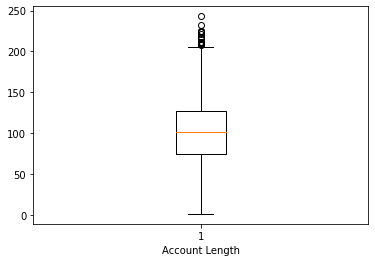

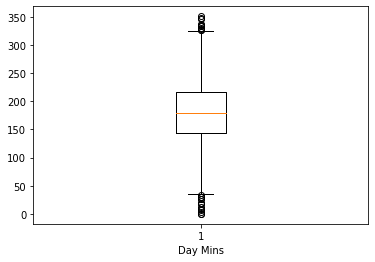

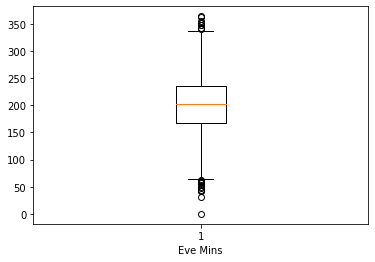

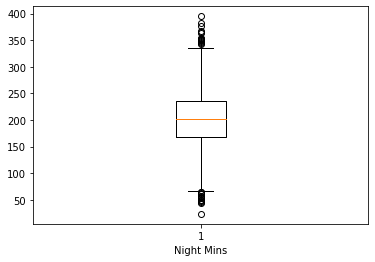

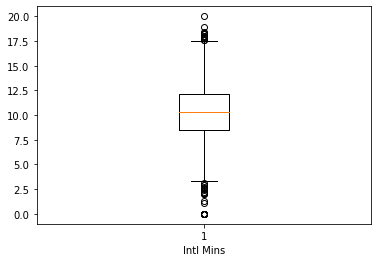

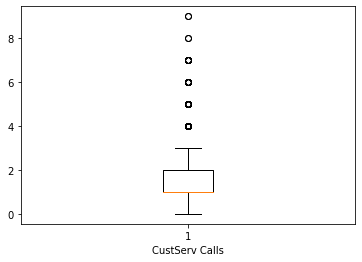

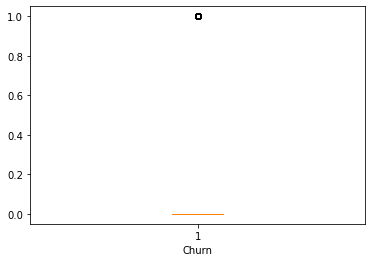

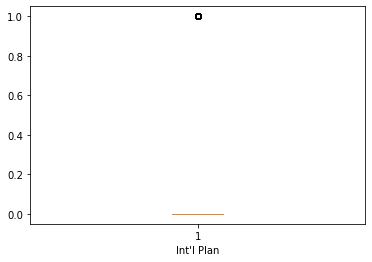

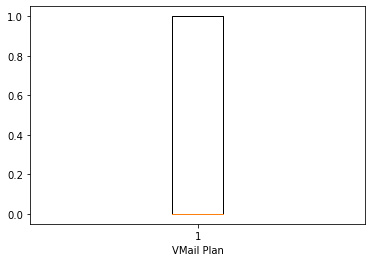

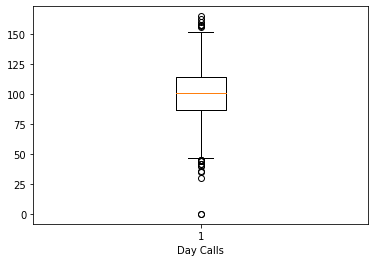

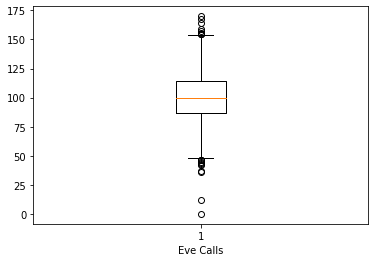

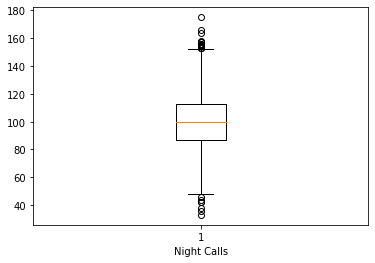

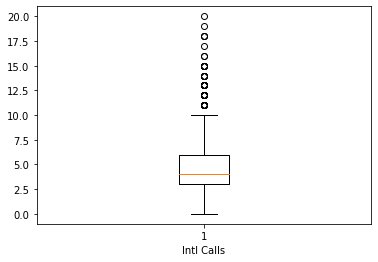

In [34]:
for i in data_num.columns.tolist():
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [35]:
## Although there are outliers in most of the cases, I believe that 
#removing them may create biases and damage the model, as they are most probably not random outliers


In [36]:
# For example observations with account length higher than 200 most probably represent 
# the most loyal customers, or those who joined company very first.


In [37]:
# Same goes for day calls and night calls, as the latter for example might represent
# certain category of people who work at nights, or have secret girlfriend, so once ommited
# our data will cease being representative

In [38]:
# In case of calls to Customer service, it is very likely that those who call CS more
# have certain issues with Telecom and are more likely to leave

In [39]:
data_num.describe()

Account Length     Day Mins     Eve Mins   Night Mins    Intl Mins  \
count     3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean       101.064806   179.775098   200.980348   200.872037    10.237294   
std         39.822106    54.467389    50.713844    50.573847     2.791840   
min          1.000000     0.000000     0.000000    23.200000     0.000000   
25%         74.000000   143.700000   166.600000   167.000000     8.500000   
50%        101.000000   179.400000   201.400000   201.200000    10.300000   
75%        127.000000   216.400000   235.300000   235.300000    12.100000   
max        243.000000   350.800000   363.700000   395.000000    20.000000   

       CustServ Calls        Churn   Int'l Plan   VMail Plan    Day Calls  \
count     3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean         1.562856     0.144914     0.096910     0.276628   100.435644   
std          1.315491     0.352067     0.295879     0.447398    20.069084   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          1.000000     0.000000     0.000000     0.000000    87.000000   
50%          1.000000     0.000000     0.000000     0.000000   101.000000   
75%          2.000000     0.000000     0.000000     1.000000   114.000000   
max          9.000000     1.000000     1.000000     1.000000   165.000000   

         Eve Calls  Night Calls   Intl Calls  
count  3333.000000  3333.000000  3333.000000  
mean    100.114311   100.107711     4.479448  
std      19.922625    19.568609     2.461214  
min       0.000000    33.000000     0.000000  
25%      87.000000    87.000000     3.000000  
50%     100.000000   100.000000     4.000000  
75%     114.000000   113.000000     6.000000  
max     170.000000   175.000000    20.000000

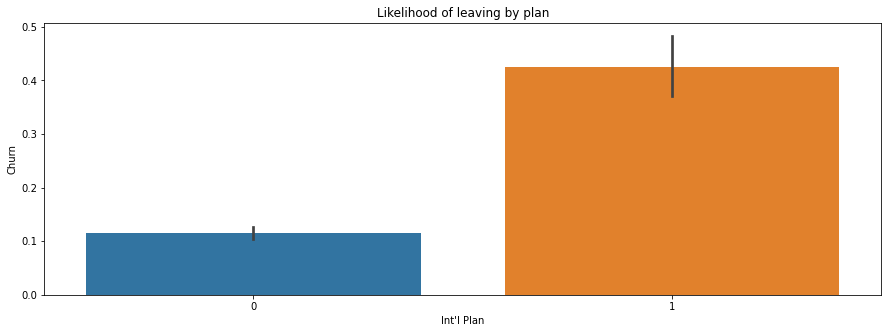

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x="Int'l Plan", y="Churn", data=data)
plt.title("Likelihood of leaving by plan")
plt.show()

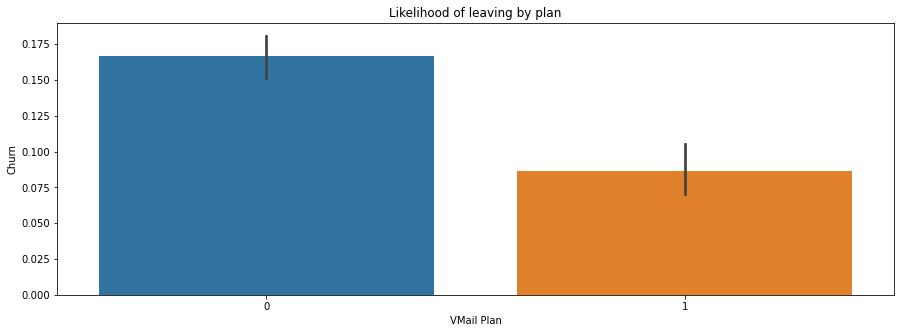

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x="VMail Plan", y="Churn", data=data)
plt.title("Likelihood of leaving by plan")
plt.show()

In [42]:
## As we can see those who subscribed for Int'l Plan are more likely to leave the company
# For example this could be explained by the fact that competitive firms have
# better offers for international calls

In [43]:
# On the other hand we see that those subscribed for Vmail Plan are a little bit less likely to leave

In [44]:
#We can plot them toghether 

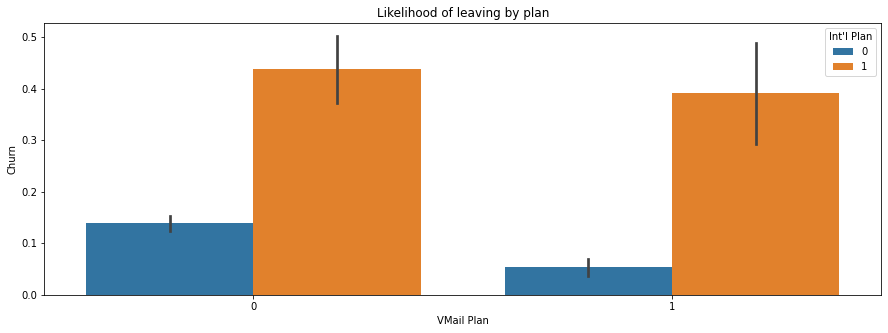

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x="VMail Plan", y="Churn", hue="Int'l Plan", data=data)
plt.title("Likelihood of leaving by plan")
plt.show()

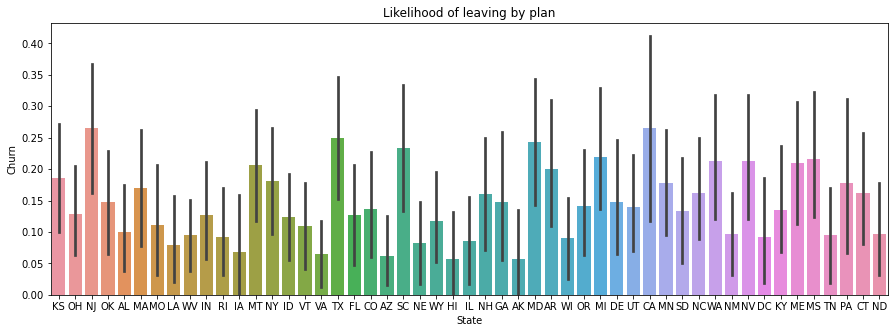

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x="State", y="Churn", data=data)
plt.title("Likelihood of leaving by plan")
plt.show()

In [47]:
# given big std and CI states also contain no usefull information, 
#may be grouping similiar states would give better results, but in this case I drop them

In [48]:
data_obj=data_obj.drop("State", axis=1)
#Contains no useful information in terms of regression

In [49]:
#data_dummies=pd.get_dummies(data_obj,prefix=data_obj.columns,drop_first=True)
# no object variables left

In [50]:
data=data_num.join(data_obj)

In [51]:
#Question 6

In [52]:
data['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [53]:
# 85% of customers do not leave
# Which means that without any model we would assume that a customer will stay, 
# hopefully the model will be more accurate

In [54]:
Y = data.Churn
X = data.drop("Churn",axis=1)
X = sm.add_constant(X)

In [55]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [56]:
model = Logit(Y0, X0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.324379
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2486
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.2104
Time:                        10:15:15   Log-Likelihood:                -810.62
converged:                       True   LL-Null:                       -1026.7
Covariance Type:            nonrobust   LLR p-value:                 5.957e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.9668      0.834     -9.558      0.000      -9.600      -6.333
Account Length     0.0006      0.002      0.355      0.723      -0.003       0.004
Day Mins           0.0118      0.001      9.547      0.000       0.009       0.014
Eve Mins           0.0065      0.001      4.967      0.000       0.004       0.009
Night Mins         0.0030      0.001      2.344      0.019       0.000       0.006
Intl Mins          0.0961      0.024      4.070      0.000       0.050       0.142
CustServ Calls     0.5142      0.045     11.529      0.000       0.427       0.602
Int'l Plan         2.1048      0.167     12.586      0.000       1.777       2.433
VMail Plan        -0.8716      0.167     -5.211      0.000      -1.199      -0.544
Day Calls          0.0005      0.003      0.148      0.882      -0.006       0.007
Eve Calls          0.0018      0.003      0.566      0.571      -0.004       0.008
Night Calls        0.0006      0.003      0.167      0.867      -0.006       0.007
Intl Calls        -0.1059      0.030     -3.539      0.000      -0.165      -0.047
==================================================================================
"""

In [57]:
Y0_hat = results.predict(X0)
Y1_hat = results.predict(X1)

In [58]:
threshold = 0.2
Y0_class = np.where(Y0_hat > threshold, 1, 0)
Y1_class = np.where(Y1_hat> threshold, 1, 0)

In [59]:
print("ROC AUC Train:", roc_auc_score(Y0, Y0_hat))
print("ROC AUC Test:", roc_auc_score(Y1, Y1_hat))

ROC AUC Train: 0.8171584833485112
ROC AUC Test: 0.8339181946403385


In [60]:
# as the Account length is not significant, we can try droping the outliers

In [61]:
datatwo=data[data["Account Length"]<200]

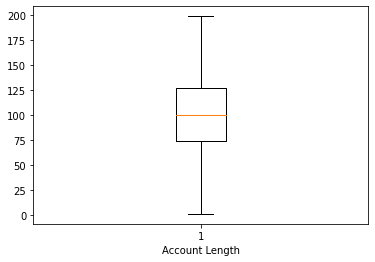

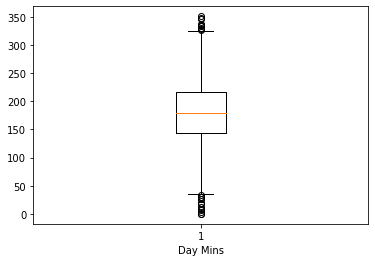

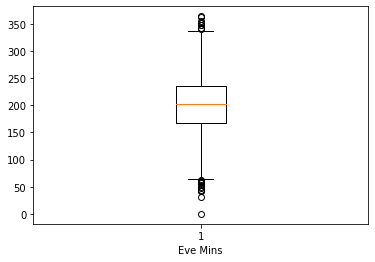

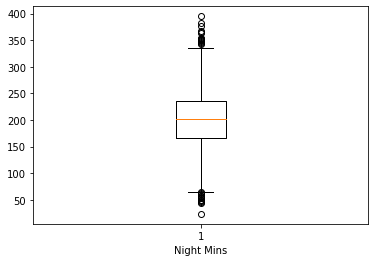

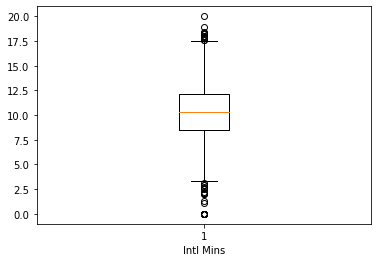

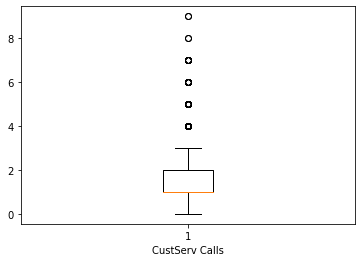

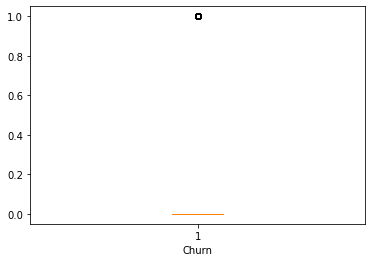

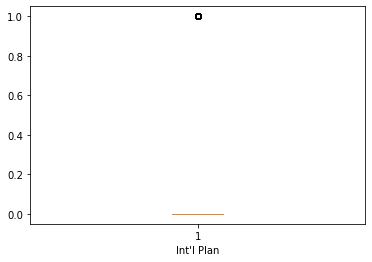

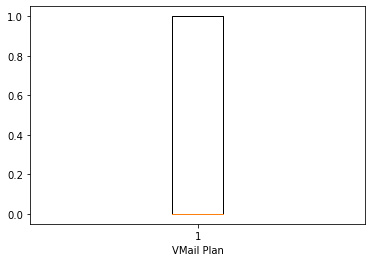

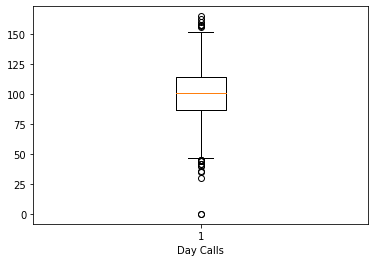

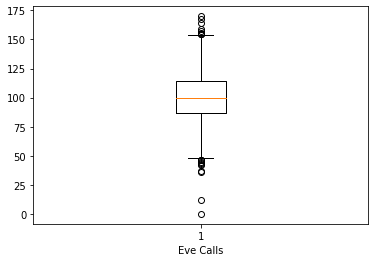

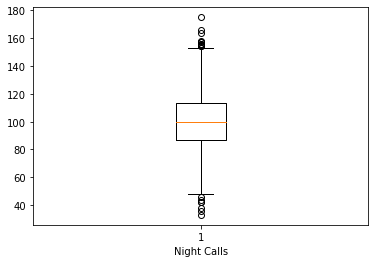

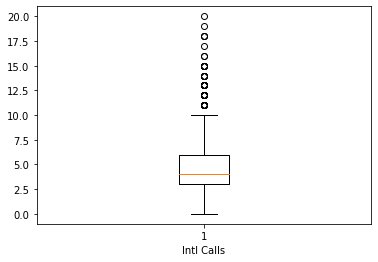

In [62]:
for i in datatwo.columns.tolist():
    plt.boxplot(datatwo[i])
    plt.xlabel(i)
    plt.show()

In [63]:
Y = datatwo.Churn
X = datatwo.drop("Churn",axis=1)
X = sm.add_constant(X)

In [64]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [65]:
model = Logit(Y0, X0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.328096
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2479
Model:                          Logit   Df Residuals:                     2466
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.2108
Time:                        10:15:16   Log-Likelihood:                -813.35
converged:                       True   LL-Null:                       -1030.7
Covariance Type:            nonrobust   LLR p-value:                 1.746e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.4400      0.827    -10.206      0.000     -10.061      -6.819
Account Length     0.0005      0.002      0.329      0.742      -0.003       0.004
Day Mins           0.0127      0.001     10.203      0.000       0.010       0.015
Eve Mins           0.0069      0.001      5.319      0.000       0.004       0.009
Night Mins         0.0032      0.001      2.487      0.013       0.001       0.006
Intl Mins          0.0820      0.023      3.490      0.000       0.036       0.128
CustServ Calls     0.5282      0.045     11.767      0.000       0.440       0.616
Int'l Plan         1.9613      0.167     11.721      0.000       1.633       2.289
VMail Plan        -0.9319      0.166     -5.613      0.000      -1.257      -0.607
Day Calls          0.0032      0.003      1.002      0.316      -0.003       0.009
Eve Calls         -0.0009      0.003     -0.296      0.767      -0.007       0.005
Night Calls        0.0017      0.003      0.526      0.599      -0.005       0.008
Intl Calls        -0.0395      0.027     -1.472      0.141      -0.092       0.013
==================================================================================
"""

In [66]:
Y0_hat = results.predict(X0)
Y1_hat = results.predict(X1)

In [67]:
threshold = 0.3
Y0_class = np.where(Y0_hat > threshold, 1, 0)
Y1_class = np.where(Y1_hat> threshold, 1, 0)

In [68]:
#Many different threshold were chosen and the best was based on trade-off between GA and sensitivity

In [69]:
print("ROC AUC Train:", roc_auc_score(Y0, Y0_hat))
print("ROC AUC Test:", roc_auc_score(Y1, Y1_hat))

ROC AUC Train: 0.8207930016676367
ROC AUC Test: 0.8242916463116756


In [70]:
print("Recall Train:", recall_score(Y0, Y0_class))
print("Recall Test:", recall_score(Y1, Y1_class))

Recall Train: 0.42265193370165743
Recall Test: 0.5043478260869565


In [71]:
# based on ROC AUC the second model is clearly better than first one, is it almost does not underfit or overfit

In [72]:
datathree=datatwo[datatwo["Day Calls"]<150]

In [73]:
datathree=datatwo[datatwo["Day Calls"]>50]

In [74]:
Y = datathree.Churn
X = datathree.drop("Churn",axis=1)
X = sm.add_constant(X)

In [75]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [76]:
model = Logit(Y0, X0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.321317
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2463
Model:                          Logit   Df Residuals:                     2450
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.2153
Time:                        10:15:17   Log-Likelihood:                -791.40
converged:                       True   LL-Null:                       -1008.6
Covariance Type:            nonrobust   LLR p-value:                 1.981e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.8579      0.854    -10.367      0.000     -10.533      -7.183
Account Length    -0.0006      0.002     -0.333      0.739      -0.004       0.003
Day Mins           0.0128      0.001     10.119      0.000       0.010       0.015
Eve Mins           0.0074      0.001      5.516      0.000       0.005       0.010
Night Mins         0.0032      0.001      2.470      0.014       0.001       0.006
Intl Mins          0.0762      0.024      3.231      0.001       0.030       0.122
CustServ Calls     0.5408      0.046     11.838      0.000       0.451       0.630
Int'l Plan         2.0398      0.175     11.628      0.000       1.696       2.384
VMail Plan        -0.9330      0.170     -5.477      0.000      -1.267      -0.599
Day Calls          0.0060      0.003      1.831      0.067      -0.000       0.013
Eve Calls          0.0034      0.003      1.039      0.299      -0.003       0.010
Night Calls       -0.0003      0.003     -0.091      0.928      -0.007       0.006
Intl Calls        -0.0734      0.029     -2.516      0.012      -0.131      -0.016
==================================================================================
"""

In [77]:
## Dropping outliers for day calls improved model and signficance of Day calls but not Account length (which is hopeless)

In [78]:
### INTERPRETATION
## Coffecients show the effect of unit change in explanatory variable on logged odds of Churn -
## for example one unit increase in Day Mins will increase logged ods of Churn by 0.0128 points (ceteris paribus)

In [79]:
Y0_hat = results.predict(X0)
Y1_hat = results.predict(X1)

In [80]:
threshold = 0.3
Y0_class = np.where(Y0_hat > threshold, 1, 0)
Y1_class = np.where(Y1_hat> threshold, 1, 0)

In [81]:
print("ROC AUC Train:", roc_auc_score(Y0, Y0_hat))
print("ROC AUC Test:", roc_auc_score(Y1, Y1_hat))

ROC AUC Train: 0.8223568483985151
ROC AUC Test: 0.820888685295465


In [82]:
print("General Accuracy Train:", accuracy_score(Y0, Y0_class))
print("General Accuracy Test:", accuracy_score(Y1, Y1_class))

General Accuracy Train: 0.8509947218838815
General Accuracy Test: 0.8526187576126675


In [83]:
print("Recall Train:", recall_score(Y0, Y0_class))
print("Recall Test:", recall_score(Y1, Y1_class))

Recall Train: 0.46438746438746437
Recall Test: 0.4745762711864407


In [84]:
## Our third model has almost indetnical ROC scores as 2nd model but for the given lvl of threshold 
# senisitivity score is far better than that of the 2nd model, and given 
# the fact that for company it is more important to identify leavers than loyal customers
# in order to implement response and stop them from abandoning the company
# Sensitivity is an important measure in this case, therefore we keep model 3 as final

In [85]:
## The models is good, overall, and it does not overfit based on all on all calculated measures

In [86]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_class))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_class))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2112
           1       0.48      0.46      0.47       351

    accuracy                           0.85      2463
   macro avg       0.69      0.69      0.69      2463
weighted avg       0.85      0.85      0.85      2463

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       703
           1       0.49      0.47      0.48       118

    accuracy                           0.85       821
   macro avg       0.70      0.70      0.70       821
weighted avg       0.85      0.85      0.85       821



In [89]:
# This is inteded for interpretation of probabilities of final model 3
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Churn
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Account Length -5.423e-05      0.000     -0.333      0.739      -0.000       0.000
Day Mins           0.0012      0.000     10.586      0.000       0.001       0.001
Eve Mins           0.0007      0.000      5.582      0.000       0.000       0.001
Night Mins         0.0003      0.000      2.475      0.013    6.44e-05       0.001
Intl Mins          0.0074      0.002      3.246      0.001       0.003       0.012
CustServ Calls     0.0522      0.004     12.689      0.000       0.044       0.060
Int'l Plan         0.1970      0.016     12.675      0.000       0.167       0.227
VMail Plan        -0.0901      0.016     -5.533      0.000      -0.122      -0.058
Day Calls          0.0006      0.000      1.833      0.067   -4.04e-05       0.001
Eve Calls          0.0003      0.000      1.039      0.299      -0.000       0.001
Night Calls    -2.889e-05      0.000     -0.091      0.928      -0.001       0.001
Intl Calls        -0.0071      0.003     -2.523      0.012      -0.013      -0.002
==================================================================================
"""

In [90]:
#An incremental change in mins of Day , Eve , Night and Intl will result in positive percentage increase of 0.12 , 0.07, 0.03, 0.74 respectively
## An incremental change in Customer service calls will result in 5% increase in probability of leaving the company
#Being A subscribed to International Plan will increase chances of living by almost 20%
# While being a customer of Vmall Plan will decrease it by 9% and so on.

In [91]:
## Account length is left in the model as I consider the negative coefficient of it to be important measure that long term customers are less likely to leave

In [92]:
#However it was not interpreteted given the high level of p-value and large variance


In [ ]:
## using skilearn to plot AUC curve

In [95]:
import seaborn as sns

#libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import scikitplot as skplt #in case of error run "pip install scikit-plot" in cmd(terminal) and run the code again

In [98]:
X=datathree.drop('Churn', axis=1)
Y=datathree.Churn

In [99]:
X0, X1, Y0, Y1=train_test_split(X,Y, test_size=0.25, random_state=42)

In [100]:
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0), columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

In [101]:
logit=LogisticRegression(random_state=42)
logit.fit(X0_scaled,Y0)

LogisticRegression(random_state=42)

In [103]:
Y0_logit=logit.predict_proba(X0_scaled)[:,1]
Y1_logit=logit.predict_proba(X1_scaled)[:,1]

In [104]:
FPR, TPR, thresholds=roc_curve(Y1, Y1_logit)

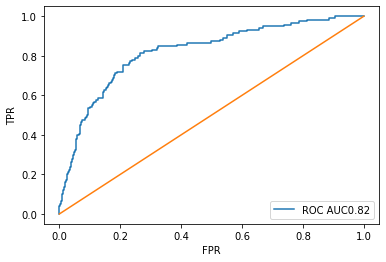

In [105]:
#plotting ROC AUC for Logistic Regression
plt.plot(FPR, TPR, label=f"ROC AUC{roc_auc_score(Y1, Y1_logit).round(2)}")
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
## Roc curve shows that predicted model is far better than random guess. I believe that in this case best Threshold will be somewhere near 0.8